In [1]:
import numpy as np
import scipy as sp
import sklearn as sk
import itertools
import os
os.sys.path.append("../")
import preprocessing as pp
import utilities as u
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import os
import umap
import umap.plot
import PlaceCellAnalysis as pc


# %matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\markp\anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
mice = ['4139265.3','4139265.4','4139265.5','4222168.1','4343703.1','4343706','4222153.1','4222153.2',
        '4222153.3','4222174.1','4222154.1','4343702.1']
first_sessions = [5,5,5,3,5,2,4,4,4,4,4,4]
rare_mice, freq_mice = mice[:6],mice[6:]

In [3]:
df = pp.load_session_db(dir='D:\\')
# df = pp.load_session_db()
df = df[df['RewardCount']>40]
df = df[df['Imaging']==1]
df = df[(df['ImagingRegion']=='CA1' )|(df['ImagingRegion']=='')]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
df = df[df["Track"]=="TwoTower_foraging"]

In [21]:
cellnumdict = {}
for m,mouse in enumerate(mice):
    print(mouse)
    df_mouse = df[df["MouseName"]==mouse]
    if mouse == '4343706':
        sessnum = np.arange(first_sessions[m],df_mouse.shape[0])
    elif mouse == '4343703.1':
        
        sessnum = np.append([1],np.arange(first_sessions[m],df_mouse.shape[0]))
    else:
        sessnum = np.append([first_sessions[m]-3],np.arange(first_sessions[m],df_mouse.shape[0]))
        
    cellnum = []
    for ind in sessnum.tolist():
        sess = df_mouse.iloc[ind]
        with open(os.path.join("D:\\Suite2P_Data\\",sess["MouseName"],"%s_%s_%i.pkl" % (sess["Track"],sess["DateFolder"],sess["SessionNumber"])),'rb') as f:
            data = pickle.load(f)
        print(ind,data['S'].shape[1],data['S_trial_mat'].shape[0])
#         print(data.keys())
        cellnum.append(data['S'].shape[1])
    cellnumdict[mouse]={}
    cellnumdict[mouse]['cellN']=cellnum
    if mouse in rare_mice:
        if mouse == "4343706":
            
            sessnum+=6
        elif mouse== '4222168.1':
            sessnum[0]+=3
            sessnum[1:]+=5
        else:
            sessnum[0]+=1
            sessnum[1:]+=3
    else:
        sessnum[0]+=2
        sessnum[1:]+=4
    cellnumdict[mouse]['sessN']=sessnum
    

4139265.3
2 1973 90
5 1828 120
6 1904 120
7 1817 120
8 1708 120
9 1715 120
4139265.4
2 1178 60
5 1632 120
6 1656 120
7 1515 120
8 1650 120
9 1498 120
10 1631 120
4139265.5
2 996 90
5 915 120
6 976 120
7 984 120
8 932 120
9 1047 120
4222168.1
0 922 60
3 919 100
4 1035 100
5 1074 100
6 940 100
4343703.1
1 1112 100
5 1194 100
4343706
2 2652 70
3 1403 60
4 1617 60
4222153.1
1 475 92
4 301 95
5 273 100
6 237 86
4222153.2
1 2016 80
4 2127 120
5 2149 120
6 2046 100
7 2006 85
4222153.3
1 295 120
4 161 90
4222174.1
1 1965 90
4 1963 75
5 1998 85
6 2047 90
7 2117 70
8 1901 80
4222154.1
1 591 120
4 309 120
5 571 100
6 326 100
7 311 90
8 257 100
4343702.1
1 3657 100
4 3313 100
5 2875 80
6 2746 100


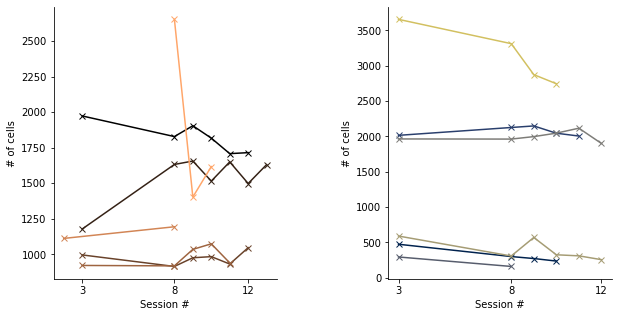

In [22]:
f,ax = plt.subplots(1,2,figsize=[10,5])
f.subplots_adjust(wspace=.5)
for m,mouse in enumerate(rare_mice):
    ax[0].plot(cellnumdict[mouse]['sessN'],cellnumdict[mouse]['cellN'],marker='x',color=plt.cm.copper(np.float(m)/6))
    
for m,mouse in enumerate(freq_mice):
    ax[1].plot(cellnumdict[mouse]['sessN'],cellnumdict[mouse]['cellN'],marker='x',color=plt.cm.cividis(np.float(m)/6.))
    
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    a.set_xlabel('Session #')
    a.set_ylabel('# of cells')
    a.set_xticks([3,8,12])
f.savefig("D:\\Morph_Results\\figures\\CellsPerSession.pdf",format="pdf")